# Library Imports:

In [1100]:
# importing the required libraries

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import regex as re

import logging
import os
from pathlib import Path
from typing import Optional

from sklearn.model_selection import train_test_split

# Dataset Imports & Initial Exploration:

In [1054]:
logger = logging.getLogger(__name__)

class DataIngestor:
    """Handles secure and validated data loading from local files."""
    
    def __init__(self, file_path: Optional[str] = None):
        self.file_path = Path(file_path or os.getenv("DATA_PATH", "data/raw_data.xlsx"))

    def load_excel_data(self, sheet_name: str = 0) -> pd.DataFrame:
        """
        Loads Excel data with error handling and validation.
        """
        logger.info(f"Attempting to load data from: {self.file_path}")

        if not self.file_path.exists():
            error_msg = f"File not found: {self.file_path}"
            logger.error(error_msg)
            raise FileNotFoundError(error_msg)

        try:
            df = pd.read_excel(self.file_path, sheet_name=sheet_name, engine='openpyxl')
            
            if df.empty:
                logger.warning("The loaded dataframe is empty.")
            else:
                logger.info(f"Successfully loaded {len(df)} rows.")
            
            return df

        except Exception as e:
            logger.error(f"Failed to read Excel file: {str(e)}")
            raise


if __name__ == "__main__":
    ingestor = DataIngestor("/Users/yagyansh/Desktop/data-science-accelerator/Lead Data Scientist Pre Work 1.xlsx")
    df = ingestor.load_excel_data()

In [1055]:
df = pd.read_excel('/Users/yagyansh/Desktop/data-science-accelerator/Lead Data Scientist Pre Work 1.xlsx')

In [1056]:
# inspecting the first few rows of the dataframe and ensuring that all columns are shown

pd.set_option('display.max_columns', None)
df.head(1)

,sale price,Date of Transfer,Property Type,is_new,Duration,town_or_city,District,County,PPD Category Type,Record Status,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,INSPECTION_DATE,LODGEMENT_DATE,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_POTENTIAL,LIGHTING_COST_CURRENT,LIGHTING_COST_POTENTIAL,HEATING_COST_CURRENT,HEATING_COST_POTENTIAL,HOT_WATER_COST_CURRENT,HOT_WATER_COST_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,FLAT_TOP_STOREY,FLAT_STOREY_COUNT,MAIN_HEATING_CONTROLS,MULTI_GLAZE_PROPORTION,GLAZED_TYPE,GLAZED_AREA,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,LOW_ENERGY_LIGHTING,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,FLOOR_DESCRIPTION,FLOOR_ENERGY_EFF,FLOOR_ENV_EFF,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,WALLS_ENERGY_EFF,WALLS_ENV_EFF,SECONDHEAT_DESCRIPTION,SHEATING_ENERGY_EFF,SHEATING_ENV_EFF,ROOF_DESCRIPTION,ROOF_ENERGY_EFF,ROOF_ENV_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_ENV_EFF,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,WIND_TURBINE_COUNT,HEAT_LOSS_CORRIDOR,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,PHOTO_SUPPLY,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,REPORT_TYPE
0,325950,2021-11-25,S,Y,F,SALFORD,SALFORD,GREATER MANCHESTER,A,A,B,A,85,95,House,End-Terrace,2021-11-02,2021-11-02,new dwelling,87,96,76,22.0,1.5,13,0.5,83.0,83.0,246.0,246.0,75.0,48.0,112.0,standard tariff,NaN,NaN,N,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,100.0,0.0,From main system,Good,Good,Average thermal transmittance 0.11 W/m-¬¶K,Very Good,Very Good,High performance glazing,Very Good,Very Good,Average thermal transmittance 0.18 W/m-¬¶K,Very Good,Very Good,NaN,NaN,NaN,Average thermal transmittance 0.1 W/m-¬¶K,Very Good,Very Good,"Boiler and radiators, mains gas",Good,Good,Time and temperature zone control,Very Good,Very Good,Low energy lighting in all fixed outlets,Very Good,Very Good,Gas: mains gas,0.0,NaN,NaN,2.338,NaN,NaN,NaN,2021,2021-11-02 12:13:49,Not defined - use in the case of a new dwellin...,10.0,NaN,101


In [1057]:
# as we have identified a naming discrepancy and duplication of Property Type variable; we would be renaming it correctly based on the values associated to it
df = df.rename(columns={
    'Property Type': 'property_structure',
    'PROPERTY_TYPE': 'property_category'
})

# lower casing all the column names in a copy of our original dataset
df1 = df.copy()
df1.columns = df1.columns.str.lower().str.replace(' ', '_')

In [1058]:
# inspecting the shape of the dataframe 
print(f'The shape of the dataframe before dropping the columns is: {df1.shape[0]} rows and {df1.shape[1]} columns.')

The shape of the dataframe before dropping the columns is: 36936 rows and 88 columns.


## Null Values Exploration:

**Features** that have > 90% missing values won't provide signalk towards predicting the **sale_price**; hence we would be dropping the following variables:

- sheating_energy_eff
- sheating_env_eff
- floor_env_eff
- flat_storey_count

In [1059]:
missing_df = pd.DataFrame({
    "missing_count": df1.isnull().sum(),
    "missing_percent": df1.isnull().mean() * 100
})

missing_df.sort_values("missing_percent", ascending=False).head(20)

,missing_count,missing_percent
sheating_energy_eff,36936,100.000000
sheating_env_eff,36936,100.000000
floor_env_eff,36153,97.880117
flat_storey_count,34943,94.604180
floor_energy_eff,32882,89.024258
secondheat_description,29201,79.058371
main_heating_controls,28990,78.487113
unheated_corridor_length,25737,69.679987
low_energy_fixed_light_count,17744,48.039853
flat_top_storey,16772,45.408274


In [1060]:
cols_to_drop = ['sheating_energy_eff', 'sheating_env_eff', 'floor_env_eff', 'flat_storey_count']
df1 = df1.drop(cols_to_drop, axis=1)
df1.shape

print(f'The shape of the dataframe after dropping the columns is: {df1.shape}')

The shape of the dataframe after dropping the columns is: (36936, 84)


## Zero Variance Feature Exploration:
We removed zero-variance features such as record_status to reduce dimensionality and improve computational efficiency. Additionally we dropped town_or_city and county because it’s highly skewed and redundant given we have the district column already as a feature. This reduces dimensionality and prevents sparse categorical features from introducing noise.

In [1061]:
df1['record_status'].value_counts()

record_status
A    36936
Name: count, dtype: int64

In [1062]:
df1['town_or_city'].value_counts()

town_or_city
LONDON           18285
MANCHESTER        1942
STOCKPORT          770
BOLTON             716
CROYDON            608
                 ...  
WHYTELEAFE           3
WARLINGHAM           2
EAST MOLESEY         1
SEVENOAKS            1
WALTHAM CROSS        1
Name: count, Length: 90, dtype: int64

In [1063]:
df1['county'].value_counts()

county
GREATER LONDON        30548
GREATER MANCHESTER     6388
Name: count, dtype: int64

In [1064]:
cols_to_drop = ['record_status', 'town_or_city', 'county']
df1 = df1.drop(cols_to_drop, axis=1)

print(f'The shape of the dataframe after dropping the column is: {df1.shape}')

The shape of the dataframe after dropping the column is: (36936, 81)


## Target Variable Exploration:

We would now inspect the **sale_price** variable to identify discrepancies in terms of pricing. From our descriptive statistics, we can clearly infer that transactions below £16,000 i.e. 0.5 percentile should be excluded from model training, as they do not reflect open-market pricing behaviour.

In [1065]:
df1['sale_price'].describe()

count    3.693600e+04
mean     3.344653e+05
std      6.569506e+05
min      1.000000e+02
25%      1.235000e+05
50%      2.250000e+05
75%      3.900000e+05
max      4.290000e+07
Name: sale_price, dtype: float64

In [1066]:
df1['sale_price'].quantile([0.001, 0.005, 0.01, 0.02])

0.001     4000.0
0.005    16000.0
0.010    23000.0
0.020    33000.0
Name: sale_price, dtype: float64

In [1067]:
lower_cap = df1['sale_price'].quantile(0.005)
df1 = df1[df1['sale_price'] >= lower_cap]

In [1068]:
print(f'The shape of the dataframe after dropping the anomolous rows is: {df1.shape}')

The shape of the dataframe after dropping the anomolous rows is: (36753, 81)


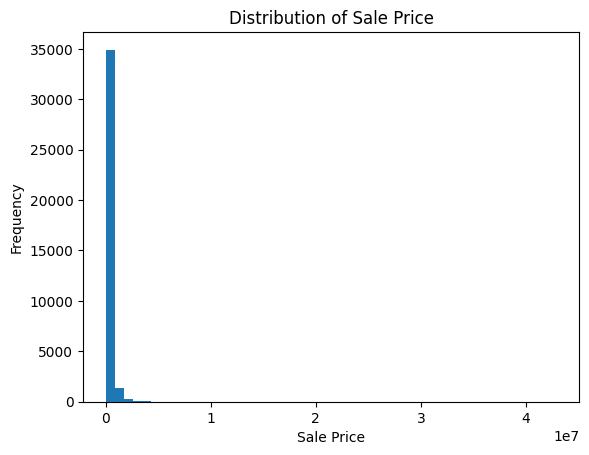

Skewness: 30.727489334518694


In [1069]:
# investigating the distribution of the target variable 
sale_price = df1['sale_price'].dropna()

plt.figure()
plt.hist(sale_price, bins=50)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sale Price")
plt.show()

# Print skewness value for reference
print("Skewness:", sale_price.skew())


In [1070]:
# using log transformation to handle skewness 
df1['log_sale_price'] = np.log1p(df1['sale_price'])

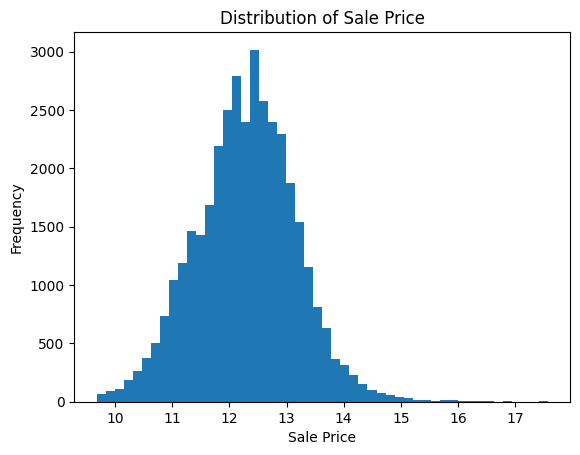

Skewness: 0.10538492621130975


In [1071]:
# investigating the distribution of the target variable 
sale_price = df1['log_sale_price'].dropna()

plt.figure()
plt.hist(sale_price, bins=50)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sale Price")
plt.show()

# Print skewness value for reference
print("Skewness:", sale_price.skew())

In [1072]:
cols_to_drop = ['sale_price']
df1 = df1.drop(cols_to_drop, axis=1)
df1.shape

print(f'The shape of the dataframe after dropping the columns is: {df1.shape}')

The shape of the dataframe after dropping the columns is: (36753, 81)


# Dimensionality Reduction:

Columns that have a **Massive Class Imbalance** are also to be dropped as they won't signal the way our ML model should function. They provide little signal and would create sparse or near-constant features, so we removed them to improve model robustness and interpretability

- report_type
- mechanical_ventilation
- wind_turbine_count
- ppd_category_type
- heat_loss_corridor
- number_open_fireplace
- unheated_corridor_length

In [1073]:
cols_to_drop = ['report_type', 'mechanical_ventilation', 'wind_turbine_count', 'ppd_category_type', 'heat_loss_corridor', 
                'number_open_fireplaces', 'unheated_corridor_length']
                
df1 = df1.drop(cols_to_drop, axis = 1)
print(f'The shape of the dataframe after dropping the columns is {df1.shape}')

The shape of the dataframe after dropping the columns is (36753, 74)


Converting datatime features:

- date_of_transfer
- inspection_date 
- lodgement_date 
- lodgement_datetime

As **lodgement_date** and **lodgement_datetime** are effectively providing the same information; we would be dropping **lodgement_date** and deriving **month and year** values from lodgement_datetime

In [1074]:
# converting columns to correct datetime format 
date_cols = [
    'date_of_transfer',
    'inspection_date',
    'lodgement_date',
    'lodgement_datetime'
]

for col in date_cols:
    df1[col] = pd.to_datetime(df1[col], errors='coerce')

# deriving year  
df1['lodgement_year'] = df1['lodgement_datetime'].dt.year

# Time Between Inspection and Sale - More recent inspections may signal better compliance
df1['days_inspection_to_sale'] = (df1['date_of_transfer'] - df1['inspection_date']).dt.days

# Time Between Lodgement and Sale
df1['days_lodgement_to_sale'] = (df1['date_of_transfer'] - df1['lodgement_date']).dt.days

# Market Timing - Macro Effects
df1['sale_year'] = df1['date_of_transfer'].dt.year

cols_to_drop = ['date_of_transfer', 'inspection_date', 'lodgement_date', 'lodgement_datetime']
df1 = df1.drop(cols_to_drop, axis = 1)

df1.shape

(36753, 74)

Having reduced the number of columns significantly we observe that there are multiple columns that have **current** and **potential** costs associated with them; to reduce dimensionality even further and derive **energy savings potential** we are going to group in the following manner.

In [1075]:
# calculating energy cost savings per house
df1['current_energy_cost'] = df1['lighting_cost_current'] + df1['heating_cost_current'] + df1['hot_water_cost_current']
df1['potential_energy_cost'] = df1['lighting_cost_potential'] + df1['heating_cost_potential'] + df1['hot_water_cost_potential']
df1['energy_cost_savings_pct'] = ((df1['current_energy_cost'] - df1['potential_energy_cost']) / df1['current_energy_cost'].replace(0, np.nan))

# calculating energy efficiency per house
df1['energy_efficiency_gain_pct'] = ((df1['potential_energy_efficiency'] - df1['current_energy_efficiency']) / df1['current_energy_efficiency'].replace(0, np.nan)).fillna(0)

# calculating environmental efficiency per house
df1['environmental_improvement'] = (df1['environment_impact_current'] - df1['environment_impact_potential'])
df1['co2_reduction'] = df1['co2_emissions_current'] - df1['co2_emissions_potential']

We would now be able to drop the following columns based on our derived features above: 

- lighting_cost_current
- heating_cost_current
- hot_water_cost_current
- lighting_cost_potential
- heating_cost_potential
- hot_water_cost_potential
- potential_energy_efficiency 
- current_energy_efficiency 
- environment_impact_potential
- environment_impact_current
- co2_emissions_potential
- co2_emissions_current
- current_energy_cost
- potential_energy_cost

In [1076]:
# dropping columns not required for current modelling and predictions 
cols_to_drop = ['lighting_cost_current', 'heating_cost_current', 'hot_water_cost_current', 'lighting_cost_potential', 
                'heating_cost_potential', 'hot_water_cost_potential','potential_energy_efficiency', 'current_energy_efficiency', 
                'environment_impact_potential', 'environment_impact_current', 'co2_emissions_potential', 'co2_emissions_current',
                'current_energy_cost', 'potential_energy_cost']

df1 = df1.drop(cols_to_drop, axis=1)
print(f'The shape of the dataframe after dropping the columns is: {df1.shape}')

The shape of the dataframe after dropping the columns is: (36753, 66)


Now we would be focusing on aspects like floor area, height and co2 emissions, following which we would be dropping the below columns:

- total_floor_area
- floor_height
- co2_emiss_curr_per_floor_area

In [1077]:
# Median impute
median_height = df1['floor_height'].median()
df1['floor_height'] = df1['floor_height'].fillna(median_height)

# property volume 
df1['property_volume'] = (df1['total_floor_area'] * df1['floor_height'])

# total CO2 emissions 
df1['total_co2_emissions'] = (df1['co2_emiss_curr_per_floor_area'] * df1['total_floor_area'])

cols_to_drop = ['co2_emiss_curr_per_floor_area', 'total_floor_area', 'floor_height']
df1 = df1.drop(cols_to_drop, axis = 1)

print(f'The shape of the dataframe after dropping the columns is: {df1.shape}')

The shape of the dataframe after dropping the columns is: (36753, 65)


As we observe in our notebook we have construction age band which is messy and unstructured; this would be grouped by using regex

- construction_age_band

In [1078]:
def extract_build_year(value):
    
    if pd.isna(value):
        return np.nan
    
    value = str(value)
    
    # Handle exact years like 2021
    if value.isdigit():
        return int(value)
    
    # Handle values like before 1900
    if "before 1900" in value:
        return 1890
    
    # Handle ranges like 1900-1929
    match = re.search(r'(\d{4})-(\d{4})', value)
    if match:
        start = int(match.group(1))
        end = int(match.group(2))
        return int((start + end) / 2)  # midpoint
    
    # Handle 2007 onwards
    match_onwards = re.search(r'(\d{4}) onwards', value)
    if match_onwards:
        return int(match_onwards.group(1))
    
    # Handle NO DATA / INVALID
    if "NO DATA" in value or "INVALID" in value:
        return np.nan
    
    return np.nan

df1['build_year'] = df1['construction_age_band'].apply(extract_build_year)
# using the build year to determine the age of our property 

current_year = 2026
df1['property_age'] = current_year - df1['build_year']

cols_to_drop = ['construction_age_band', 'build_year']
df1 = df1.drop(cols_to_drop, axis = 1)

print(f'The shape of the dataframe after dropping the columns is: {df1.shape}')


The shape of the dataframe after dropping the columns is: (36753, 65)


As we are more concerned with predicting out-of-date prices instead of focussing on Long Term Regulatory Approval, we would be dropping the below columns:

- hot_water_env_eff
- windows_env_eff
- walls_env_eff
- roof_env_eff
- mainheat_env_eff
- mainheatc_env_eff
- lighting_env_eff

In [1079]:
cols_to_drop = ['hot_water_env_eff', 'windows_env_eff', 'walls_env_eff', 
                'roof_env_eff', 'mainheat_env_eff', 'mainheatc_env_eff', 
                'lighting_env_eff']
df1 = df1.drop(cols_to_drop, axis = 1)

print(f'The shape of the dataframe after dropping the columns is: {df1.shape}')

The shape of the dataframe after dropping the columns is: (36753, 58)


In [1080]:
df1.head(1)

,property_structure,is_new,duration,district,current_energy_rating,potential_energy_rating,property_category,built_form,transaction_type,energy_consumption_current,energy_consumption_potential,energy_tariff,mains_gas_flag,floor_level,flat_top_storey,main_heating_controls,multi_glaze_proportion,glazed_type,glazed_area,extension_count,number_habitable_rooms,number_heated_rooms,low_energy_lighting,hotwater_description,hot_water_energy_eff,floor_description,floor_energy_eff,windows_description,windows_energy_eff,walls_description,walls_energy_eff,secondheat_description,roof_description,roof_energy_eff,mainheat_description,mainheat_energy_eff,mainheatcont_description,mainheatc_energy_eff,lighting_description,lighting_energy_eff,main_fuel,photo_supply,solar_water_heating_flag,tenure,fixed_lighting_outlets_count,low_energy_fixed_light_count,log_sale_price,lodgement_year,days_inspection_to_sale,days_lodgement_to_sale,sale_year,energy_cost_savings_pct,energy_efficiency_gain_pct,environmental_improvement,co2_reduction,property_volume,total_co2_emissions,property_age
0,S,Y,F,SALFORD,B,A,House,End-Terrace,new dwelling,76,22.0,standard tariff,NaN,NaN,N,NaN,100.0,NaN,NaN,NaN,NaN,NaN,100.0,From main system,Good,Average thermal transmittance 0.11 W/m-¬¶K,Very Good,High performance glazing,Very Good,Average thermal transmittance 0.18 W/m-¬¶K,Very Good,NaN,Average thermal transmittance 0.1 W/m-¬¶K,Very Good,"Boiler and radiators, mains gas",Good,Time and temperature zone control,Very Good,Low energy lighting in all fixed outlets,Very Good,Gas: mains gas,NaN,NaN,Not defined - use in the case of a new dwellin...,10.0,NaN,12.694502,2021,23,23,2021,0.066832,0.117647,-9,1.0,261.856,1456.0,5.0


We would now be encoding the **Efficiency Ratings** for each household and once we have the overall household energy, we would be dropping the below columns:

- hot_water_energy_eff
- floor_energy_eff
- windows_energy_eff
- walls_energy_eff
- roof_energy_eff
- mainheat_energy_eff
- mainheatc_energy_eff
- lighting_energy_eff


In [1082]:
def energy_eff_imputation(df):
    """
    Standardises, encodes, and imputes EPC efficiency values based on 
    property context to ensure physical consistency.
    """
    # 1. Setup
    mapping = {'Very Poor': 1, 'Poor': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
    
    fabric_cols = ['roof_energy_eff', 'walls_energy_eff', 'windows_energy_eff', 'floor_energy_eff']
    system_cols = ['mainheat_energy_eff', 'mainheatc_energy_eff', 
                   'hot_water_energy_eff', 'lighting_energy_eff']

    all_eff_cols = fabric_cols + system_cols

    # 2. Conversion Step: Convert strings to numbers first
    # We strip whitespace to prevent "Good " from becoming NaN
    for col in all_eff_cols:
        if col in df.columns:
            df[col] = df[col].str.strip().map(mapping)

    # 3. Row-wise Fabric Imputation (Math now works because they are numbers)
    # We calculate the average of the available fabric numbers for each house
    fabric_row_avg = df[fabric_cols].mean(axis=1).round().fillna(3)
    for col in fabric_cols:
        df[col] = df[col].fillna(fabric_row_avg).astype(int)

    # 4. Row-wise Systems Imputation
    system_row_avg = df[system_cols].mean(axis=1).round().fillna(3)
    for col in system_cols:
        df[col] = df[col].fillna(system_row_avg).astype(int)

    # 5. FINAL WEIGHTED INDICES
    # Now that everything is an integer, we can safely perform weighted math
    df['fabric_index'] = (
        (df['roof_energy_eff'] * 1.5) + 
        (df['walls_energy_eff'] * 1.5) + 
        df['floor_energy_eff'] +
        df['windows_energy_eff']
    )
    
    df['systems_index'] = (
        df['mainheat_energy_eff'] + 
        df['mainheatc_energy_eff'] +
        df['hot_water_energy_eff'] + 
        (df['lighting_energy_eff'] * 0.5)
    )

    return df.head(1)

In [1083]:
energy_eff_imputation(df1)

,property_structure,is_new,duration,district,current_energy_rating,potential_energy_rating,property_category,built_form,transaction_type,energy_consumption_current,energy_consumption_potential,energy_tariff,mains_gas_flag,floor_level,flat_top_storey,main_heating_controls,multi_glaze_proportion,glazed_type,glazed_area,extension_count,number_habitable_rooms,number_heated_rooms,low_energy_lighting,hotwater_description,hot_water_energy_eff,floor_description,floor_energy_eff,windows_description,windows_energy_eff,walls_description,walls_energy_eff,secondheat_description,roof_description,roof_energy_eff,mainheat_description,mainheat_energy_eff,mainheatcont_description,mainheatc_energy_eff,lighting_description,lighting_energy_eff,main_fuel,photo_supply,solar_water_heating_flag,tenure,fixed_lighting_outlets_count,low_energy_fixed_light_count,log_sale_price,lodgement_year,days_inspection_to_sale,days_lodgement_to_sale,sale_year,energy_cost_savings_pct,energy_efficiency_gain_pct,environmental_improvement,co2_reduction,property_volume,total_co2_emissions,property_age,fabric_index,systems_index
0,S,Y,F,SALFORD,B,A,House,End-Terrace,new dwelling,76,22.0,standard tariff,NaN,NaN,N,NaN,100.0,NaN,NaN,NaN,NaN,NaN,100.0,From main system,4,Average thermal transmittance 0.11 W/m-¬¶K,5,High performance glazing,5,Average thermal transmittance 0.18 W/m-¬¶K,5,NaN,Average thermal transmittance 0.1 W/m-¬¶K,5,"Boiler and radiators, mains gas",4,Time and temperature zone control,5,Low energy lighting in all fixed outlets,5,Gas: mains gas,NaN,NaN,Not defined - use in the case of a new dwellin...,10.0,NaN,12.694502,2021,23,23,2021,0.066832,0.117647,-9,1.0,261.856,1456.0,5.0,25.0,15.5


In [1084]:
cols_to_drop = ['roof_energy_eff', 'walls_energy_eff', 'windows_energy_eff', 
                'mainheat_energy_eff', 'mainheatc_energy_eff', 'hot_water_energy_eff', 
                'lighting_energy_eff', 'floor_energy_eff']

df1 = df1.drop(cols_to_drop, axis = 1)
print(f'The shape of the dataframe after dropping the columns is: {df1.shape}')

The shape of the dataframe after dropping the columns is: (36753, 52)


In [1085]:
df1.head(1)

,property_structure,is_new,duration,district,current_energy_rating,potential_energy_rating,property_category,built_form,transaction_type,energy_consumption_current,energy_consumption_potential,energy_tariff,mains_gas_flag,floor_level,flat_top_storey,main_heating_controls,multi_glaze_proportion,glazed_type,glazed_area,extension_count,number_habitable_rooms,number_heated_rooms,low_energy_lighting,hotwater_description,floor_description,windows_description,walls_description,secondheat_description,roof_description,mainheat_description,mainheatcont_description,lighting_description,main_fuel,photo_supply,solar_water_heating_flag,tenure,fixed_lighting_outlets_count,low_energy_fixed_light_count,log_sale_price,lodgement_year,days_inspection_to_sale,days_lodgement_to_sale,sale_year,energy_cost_savings_pct,energy_efficiency_gain_pct,environmental_improvement,co2_reduction,property_volume,total_co2_emissions,property_age,fabric_index,systems_index
0,S,Y,F,SALFORD,B,A,House,End-Terrace,new dwelling,76,22.0,standard tariff,NaN,NaN,N,NaN,100.0,NaN,NaN,NaN,NaN,NaN,100.0,From main system,Average thermal transmittance 0.11 W/m-¬¶K,High performance glazing,Average thermal transmittance 0.18 W/m-¬¶K,NaN,Average thermal transmittance 0.1 W/m-¬¶K,"Boiler and radiators, mains gas",Time and temperature zone control,Low energy lighting in all fixed outlets,Gas: mains gas,NaN,NaN,Not defined - use in the case of a new dwellin...,10.0,NaN,12.694502,2021,23,23,2021,0.066832,0.117647,-9,1.0,261.856,1456.0,5.0,25.0,15.5


In [1086]:
cols_to_drop = ['current_energy_rating', 'potential_energy_rating', 'energy_consumption_current', 'energy_consumption_potential', 
                'energy_tariff', 'number_heated_rooms']

df1 = df1.drop(cols_to_drop, axis = 1)
print(f'The shape of the dataframe after dropping the columns is: {df1.shape}')

The shape of the dataframe after dropping the columns is: (36753, 46)


As in our fabric and systems index we used roof, wall and windows; we would now incorporate their descriptions to gather signal.

- windows_description 
- walls_description 
- roof_description 
- mainheat_energy_eff
- mainheatc_energy_eff
- hot_water_energy_eff
- lighting_energy_eff

In [1088]:
def clean_windows(desc):
    desc = str(desc).lower()
    if 'double' in desc or 'high performance' in desc:
        return 'Double/high perf'
    elif 'single' in desc:
        return 'Single'
    elif 'triple' in desc:
        return 'Triple'
    else:
        return 'Other'

def clean_roof(desc):
    desc = str(desc).lower()
    if "another dwelling above" in desc:
        return "No_External_Roof"
    elif "pitched" in desc:
        return "Pitched"
    elif "flat" in desc:
        return "Flat"
    elif "roof room" in desc:
        return "Roof_Room"
    else:
        return "Other"

def clean_walls(desc):
    if 'solid brick' in desc.lower():
        return 'Solid brick'
    elif 'cavity wall' in desc.lower():
        if 'insulated' in desc.lower() or 'filled' in desc.lower():
            return 'Cavity wall insulated'
        else:
            return 'Cavity wall uninsulated'
    elif 'system built' in desc.lower():
        return 'System built'
    else:
        return 'Other'

df1['walls_clean'] = df1['walls_description'].fillna('Other').apply(clean_walls)
df1['windows_clean'] = df1['windows_description'].fillna('Other').apply(clean_windows)
df1['roof_clean'] = df1['roof_description'].fillna('Other').apply(clean_roof)

In [1089]:
cols_to_drop = ['walls_description', 'windows_description', 'roof_description', 
                'lodgement_year', 'days_lodgement_to_sale', 'mains_gas_flag']
df1 = df1.drop(cols_to_drop, axis =1)

In [1090]:
df1.head(1)

,property_structure,is_new,duration,district,property_category,built_form,transaction_type,floor_level,flat_top_storey,main_heating_controls,multi_glaze_proportion,glazed_type,glazed_area,extension_count,number_habitable_rooms,low_energy_lighting,hotwater_description,floor_description,secondheat_description,mainheat_description,mainheatcont_description,lighting_description,main_fuel,photo_supply,solar_water_heating_flag,tenure,fixed_lighting_outlets_count,low_energy_fixed_light_count,log_sale_price,days_inspection_to_sale,sale_year,energy_cost_savings_pct,energy_efficiency_gain_pct,environmental_improvement,co2_reduction,property_volume,total_co2_emissions,property_age,fabric_index,systems_index,walls_clean,windows_clean,roof_clean
0,S,Y,F,SALFORD,House,End-Terrace,new dwelling,NaN,N,NaN,100.0,NaN,NaN,NaN,NaN,100.0,From main system,Average thermal transmittance 0.11 W/m-¬¶K,NaN,"Boiler and radiators, mains gas",Time and temperature zone control,Low energy lighting in all fixed outlets,Gas: mains gas,NaN,NaN,Not defined - use in the case of a new dwellin...,10.0,NaN,12.694502,23,2021,0.066832,0.117647,-9,1.0,261.856,1456.0,5.0,25.0,15.5,Other,Double/high perf,Other


In [1091]:
floor_mapping = {
    'ground': 0, 'ground floor': 0, '0': 0, 'nodata!': np.nan, 'no data!': np.nan,
    '1st': 1, '1': 1, '2nd': 2, '2': 2, '3rd': 3, '3': 3, '4th': 4, '4': 4,
    '5th': 5, '5': 5, '6th': 6, '6': 6, '7th': 7, '7': 7, '8th': 8, '8': 8,
    '9th': 9, '9': 9, '10th': 10, '10': 10, '11': 11,
    'mid floor': np.nan, 'top floor': np.nan, 'basement': -1, '-1': -1,
    '20+': 20, '21st or above': 21
}

df1['floor_level_clean'] = df1['floor_level'].astype(str).str.lower().map(lambda x: floor_mapping.get(x, np.nan))
df1['floor_level_clean'] = df1['floor_level_clean'].fillna(df1['floor_level_clean'].median())

In [1092]:
cols_to_drop = ['floor_level']

df1 = df1.drop(columns = cols_to_drop)
df1.shape

(36753, 43)

In [1101]:
def map_transaction_type(x):
    if x in ['marketed sale', 'rental', 'new dwelling', 'non marketed sale']:
        return x
    else:
        return 'Other'
    
df1['transaction_type_clean'] = df1['transaction_type'].apply(map_transaction_type)

cols_to_drop = ['transaction_type']

df1 = df1.drop(columns = cols_to_drop)
df1.shape

(36753, 43)

In [1105]:
cols_to_drop = ['secondheat_description', 'main_heating_controls']
df1 = df1.drop(cols_to_drop, axis = 1)

# Model Training:

In [1106]:
print(f'The shape of the dataframe after dropping the columns is: {df1.shape[0]} rows and {df1.shape[1]} columns.')

The shape of the dataframe after dropping the columns is: 36753 rows and 41 columns.


In [1112]:
df1.isnull().sum().nlargest(18)

low_energy_fixed_light_count    17654
flat_top_storey                 16662
photo_supply                     5837
fixed_lighting_outlets_count     5629
solar_water_heating_flag         4857
extension_count                  2532
number_habitable_rooms           2532
property_age                     2017
multi_glaze_proportion           1890
glazed_type                       906
glazed_area                       906
low_energy_lighting               763
main_fuel                         311
tenure                            220
mainheatcont_description          138
built_form                         19
energy_cost_savings_pct             2
floor_description                   1
dtype: int64

In [1097]:
train = df1[df1["sale_year"] <= 2024]
test  = df1[df1["sale_year"] > 2024]